# Avacado Project:

Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 


Content:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation                                   
AveragePrice - the average price of a single avocado                 
type - conventional or organic                                       
year - the year                                                      
Region - the city or region of the observation                       
Total Volume - Total number of avocados sold                         
4046 - Total number of avocados with PLU 4046 sold                   
4225 - Total number of avocados with PLU 4225 sold                   
4770 - Total number of avocados with PLU 4770 sold                   


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
# Importing all the Required Libraries need for this project
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading csv file to import data to jupyter notebook for analysis.
data=pd.read_csv('avocado.csv')
df=pd.DataFrame(data)
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


* This is a start of new chapter for me, as this one of the biggest dataset i have taken part in till now having 18249 rows and 14 columns.

In [3]:
# Checking first 10 rows of the dataset.
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [4]:
# Checking last 10 rows
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Initial Impressions:
    
* from these df.head and df.tail, we can observe that this data is collected from 2015 till 2018, 
* There is one Unnamed Column in the dataset, we have check that column as it is showing 0 to 9 values in both df.head and df.tail.
* There is one Date column from which we will extract Date, month and year seprately. for year there is one independent column already given. so, we need to drop one.
* There is one XLargeBags column which is showing 0.0 values in all 10 columns, we need to check this column, if there are only 0 values we can drop the column and clean our data.

# Exploring Data Analysis(EDA):

In [5]:
# Lets check the shape of the dataset
df.shape

(18249, 14)

In [6]:
# lets check info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


* Here we can see that there are 14 columns as we are required to analyse The dataset in two angles to find the region and find the average price .
so, our target region is in object dtype and second target Average Price has float Datatype.
The Column Date has Object Datatype.which we need to change, so we will separate date, month and year.

In [7]:
# Lets check the dataset for null or NaN values
df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

* Here we are confirmed that there are no null or NaN values present in the dataset.

In [8]:
# Lets check null values
df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

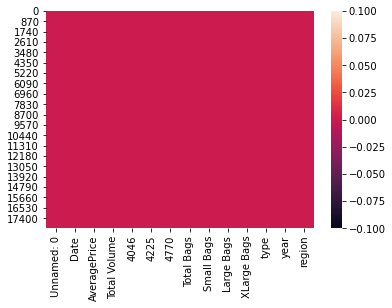

In [9]:
sns.heatmap(df.isnull())

In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
df['Unnamed: 0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

* There are total of 18249 rows present in the dataset, and this column has values till maximum 52 and we don't require this column for our project, so we can drop this column.

In [12]:
# Dropping the column Unnamed:0
df.drop("Unnamed: 0", axis=1, inplace= True)

In [13]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


we have successfully removed the unrequired column.

In [14]:
# Lets Seprate the Date Column into Day, Month, Year to avoid duplication we will also drop Column Date and year present in the dataset
df['Year'],df['Month'],df['Day']=df['Date'].str.split('-').str
df.drop(columns=['Date','year'],inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


* We have successfully splitted the Date column and removed duplicate column

In [15]:
# lets now check the df.dtype to check the dtypes of new columns as well
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
region           object
Year             object
Month            object
Day              object
dtype: object

* Here we can see that new columns also has the dtype object, so we need to conver it to integer first.

In [16]:
# Converting the dtype from object to int and renaming column day to date and deleting day column from the dataset.
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29


* We have Successfully Updated our dataset with date, month and year column with dtype int.

In [17]:
# lets check column XLarge Bags as top 10 and bottom 10 column show 0.0 values
df['XLarge Bags'].unique()

array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

* There are values present and as this columns carry quantity of Avacado, so we cant remove it.

In [18]:
# Lets check unique values in all the columns of the dataset
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
region             54
Year                4
Month              12
Date               31
dtype: int64

In [19]:
# # lets check the Statistical summary of the dataset provided, studying and observing the data.
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Date
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


* While observing the above table, we can clearly see that there are outliers, skewness present in all the columns of the dataset.

* We can also see in XLarge Bags, Very huge amount of outliers ( on the basis of difference between max and 75% percentile) are present, and Skewness is towards right it means Right Skewed Data.

In [20]:
# Checking the Skewness using df.skew()
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
Month            0.106617
Date             0.014310
dtype: float64

* Here we can see that except 4 columns i.e Average price, year, month and date all the columns have high skewness present. on the basis of acceptable range which is +/- 0.5.

# Univariate Analysis:

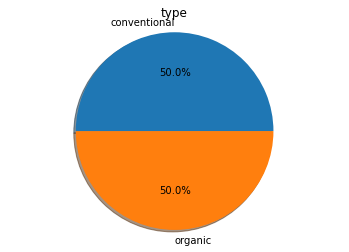

In [21]:
# lets visualize type using pie plot
# Importing all Required Libraries for Visualization purpose
import matplotlib.pyplot as plt
a=df['type'].value_counts()
plt.pie(a,labels=a.index, shadow=True, autopct="%0.1f%%")
plt.title("type")
plt.axis("equal")
plt.show()

* Here we can see that two types conventional and organic, conventional farming uses fertilizers and chemical during farming and Organic farming which has little more input cost and takes more time than conventional farming but is very good for health.

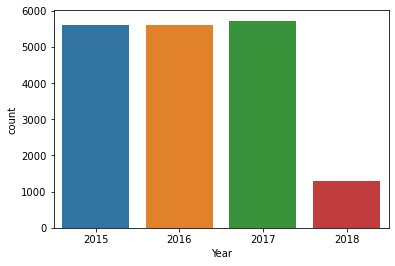

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


In [22]:
# Lets check the data yearwise
sns.countplot(x="Year", data=df)
plt.show()
print(df['Year'].value_counts())

* Here we can see that there is almost same quantity sold in the year 2015 till 2017, but very less in 2018, may be its because this data was saved in first half or mid of the year 2018.

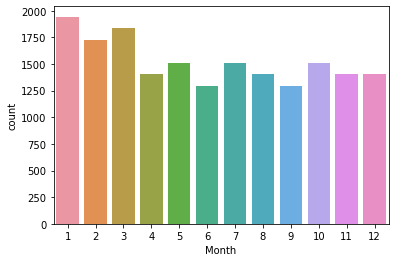

1     1944
3     1836
2     1728
5     1512
7     1512
10    1512
4     1404
8     1404
11    1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


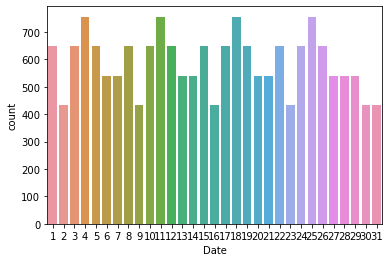

11    756
4     756
18    755
25    755
8     648
12    648
24    648
1     648
26    648
22    648
5     648
19    648
3     648
15    648
17    648
10    648
27    540
28    540
7     540
14    540
29    540
21    540
20    540
13    540
6     539
30    432
16    432
9     432
23    432
2     432
31    432
Name: Date, dtype: int64


In [23]:
# Now lets visualize the data month wise and date wise
sns.countplot(x='Month', data=df)
plt.show()
print(df['Month'].value_counts())


sns.countplot(x='Date', data=df)
plt.show()
print(df['Date'].value_counts())

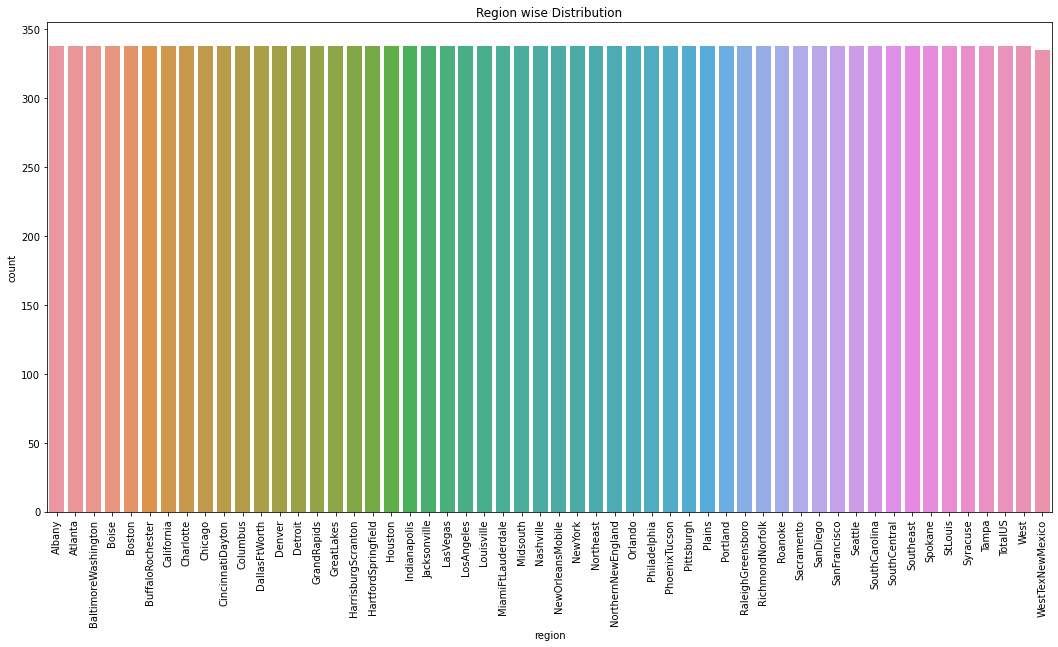

Philadelphia           338
Pittsburgh             338
TotalUS                338
Portland               338
GreatLakes             338
HartfordSpringfield    338
Detroit                338
Atlanta                338
Spokane                338
RaleighGreensboro      338
Albany                 338
CincinnatiDayton       338
Houston                338
Indianapolis           338
SouthCentral           338
Nashville              338
HarrisburgScranton     338
BuffaloRochester       338
GrandRapids            338
Syracuse               338
NewOrleansMobile       338
BaltimoreWashington    338
Boston                 338
Orlando                338
SanFrancisco           338
NewYork                338
Denver                 338
StLouis                338
Roanoke                338
Chicago                338
Boise                  338
DallasFtWorth          338
NorthernNewEngland     338
Jacksonville           338
Sacramento             338
Plains                 338
RichmondNorfolk        338
W

In [24]:
# Lets check which region bought more avacados?
plt.figure(figsize=(18,9))
sns.countplot(df['region'], data=df)
plt.title('Region wise Distribution')
plt.xticks(rotation=90)
plt.show()
print(df['region'].value_counts())

* All the regions have got same quantity i.e. 338, although WestTexNewMexico got 335, but difference is very small we dont need to treat it.

# Bivariate Analysis:

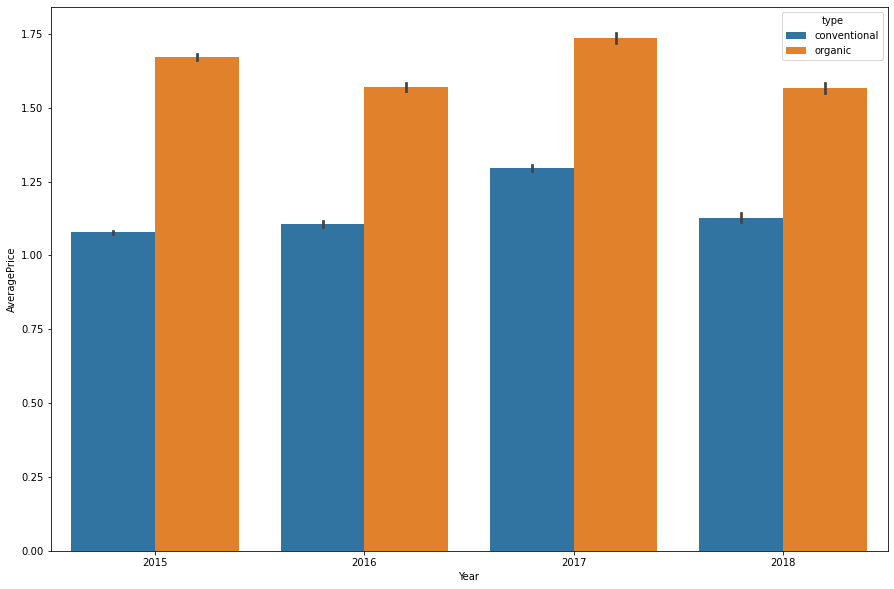

In [25]:
# Lets check Average Price Yearwise.
plt.figure(figsize=(15,10))
sns.barplot(x='Year',y='AveragePrice', hue='type', data=df)
plt.show()

* Here we can see that prices of Conventional Avacado was almost similar except in 2017 when it was little costlier, while Organic Avacado prices differ a little every year.

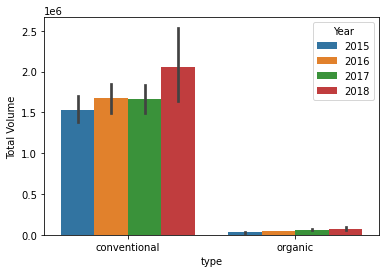

In [26]:
# Lets visualize and compare Total Volumne sold for conventional and organic.
sns.barplot(x='type', y='Total Volume', hue='Year', data= df)
plt.show()

* here we can see huge difference between Total Volume of Conventional farming and organic farming.

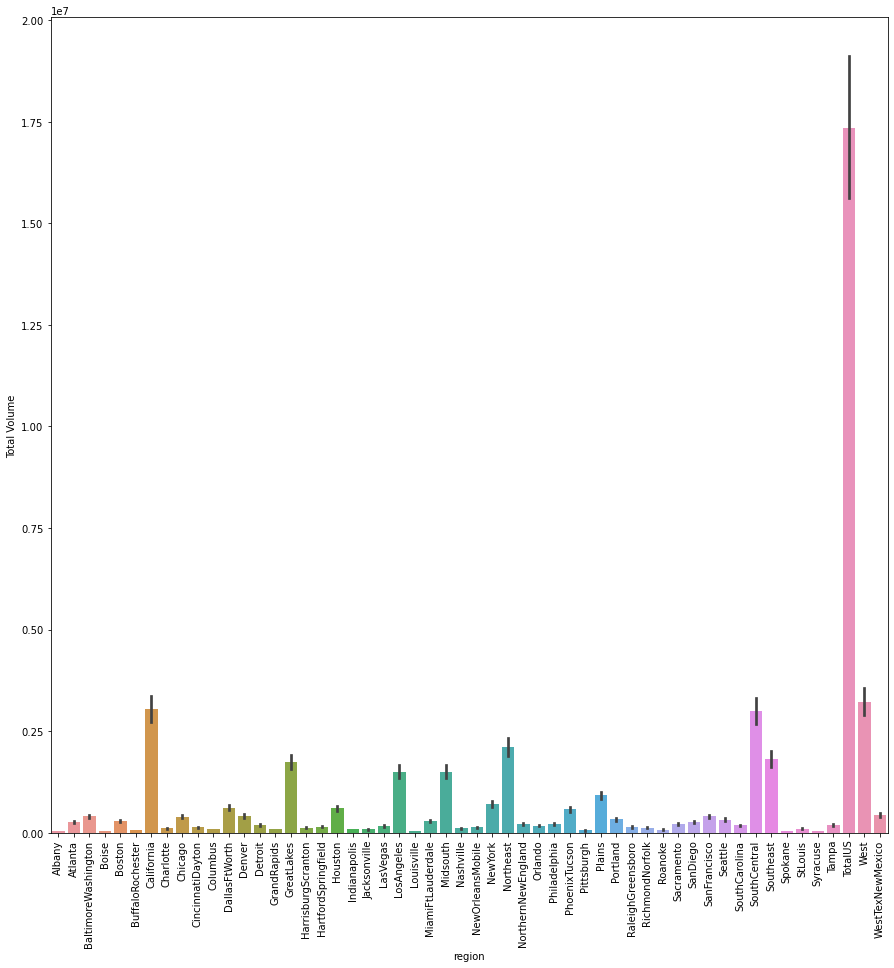

In [27]:
# Lets visualize Total Volume Regionwise.
plt.figure(figsize=(15,15))
sns.barplot(x='region', y='Total Volume', data=df)
plt.xticks(rotation=90)
plt.show()

* Here  we can see a sorted number of Total Volume of avacados sold from each region.

<Figure size 5184x648 with 0 Axes>

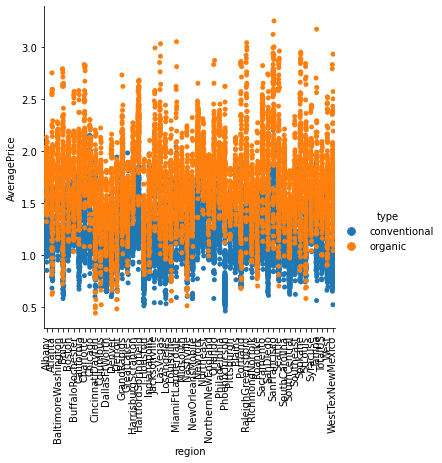

In [28]:
# Checking regionwise Average Price in the dataset.
plt.figure(figsize=(72,9))
sns.catplot(x="region", y="AveragePrice", hue='type', data=df)
plt.xticks(rotation=90)
plt.show()

# Multivariate Analysis:

In [29]:
# lets check the correlation between all the columns
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month,Date
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319
Year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050,0.004475


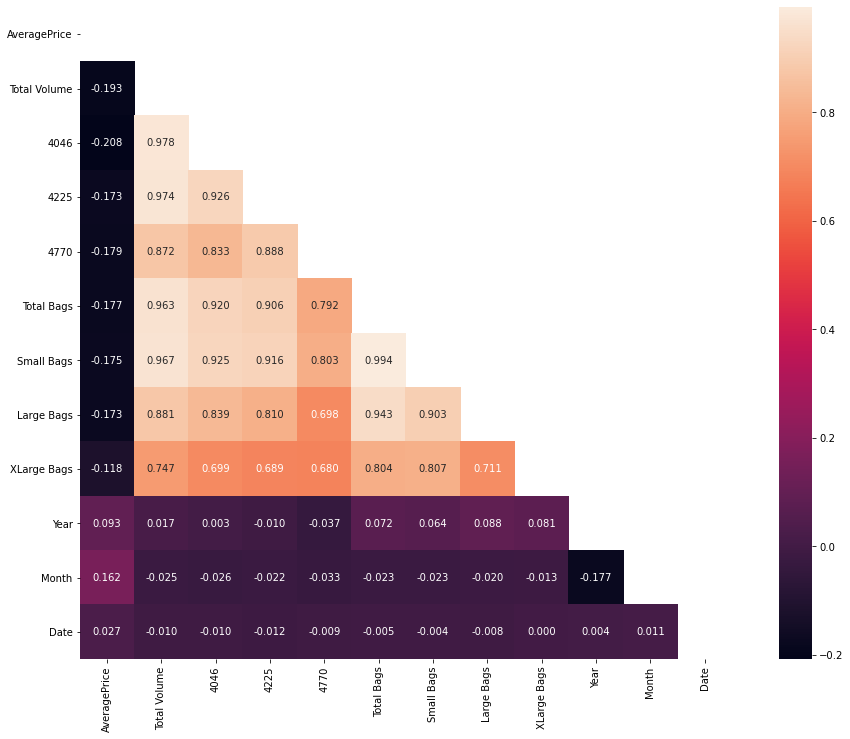

In [30]:
# Lets visualise it for better understanding the above correlation chart.
tri=np.triu(df.corr())
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), annot=True, square= True, fmt='0.3f', mask=tri)
plt.xticks(rotation=90)
plt.show()

There is very high correlation among Total Volume, X-large bags, large bags, small bags,total bags,4740,4225,4046.

# Encoding:

In [31]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df["region"]=oe.fit_transform(df["region"].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,2018,1,14


* Here we have changed the object datatype columns into numeric values to use data in models

# Outliers:

AveragePrice       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Total Volume    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
4046             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
4225            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
4770            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Total Bags         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Small Bags      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Large Bags       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
XLarge Bags     AxesSubplot(0.606034,0.391471;0.133621x0.222059)
type            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
region                AxesSubplot(0.125,0.125;0.133621x0.222059)
Year               AxesSubplot(0.285345,0.125;0.133621x0.222059)
Month               AxesSubplot(0.44569,0.125;0.133621x0.222059)
Date               AxesSubplot(0.606034,0.125;0.133621x0.222059)
dtype: object

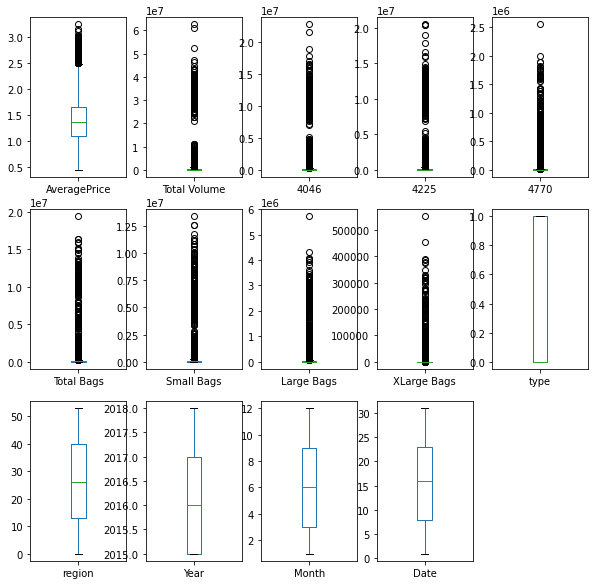

In [32]:
# lets check our dataset for outliers present/not in all the columns.
df.plot(kind='box',figsize=(10,10),layout=(3,5),subplots=True)

* Here we can clearly see Very high count of Outliers Present in the columns Total Volume, 4046,4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags amd some outliers are present in Average price too.

In [33]:
# Removing Outliers from the dataset using Zscore method.so, that we don't loose much data.
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,2018,1,14


* We have successfully removed some outliers which should help our model in better prediction.

In [34]:
# Lets check the data lost?
df.shape

(18249, 14)

In [35]:
df1.shape

(17651, 14)

In [36]:
d_lost=(df.shape[0]-df1.shape[0])/df.shape[0]*100
d_lost

3.276891884486821

Using Z score method we lost 3.3% data to remove outliers which is well under limit and ok.

# Skewness:

In [37]:
# lets check skewness in our new dataframe df1
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
Date            0.011778
dtype: float64

* After removing outliers we can observe drop in skewness too but it is still above recommended (+/-0.5).so, we need to to try and remove as much as possible.

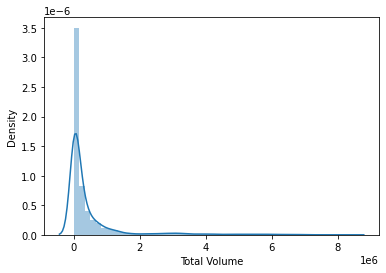

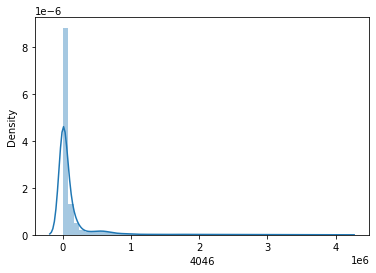

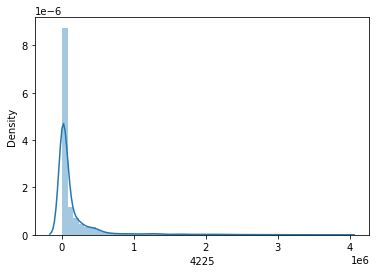

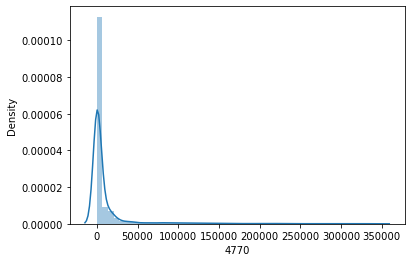

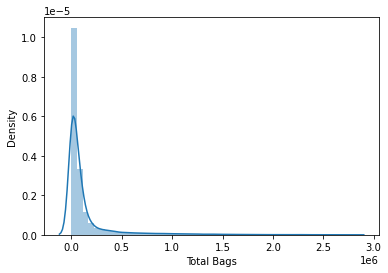

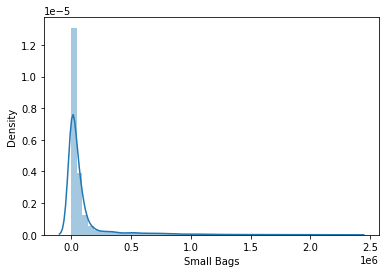

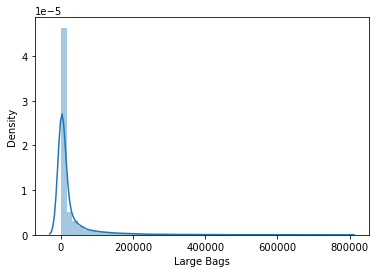

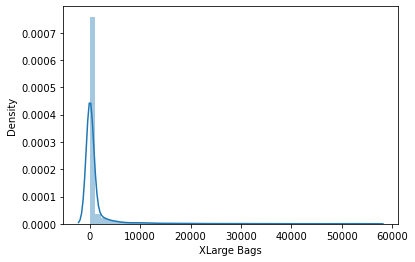

In [38]:
# Visualizing Skewness using distplot

a=["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

for i in a:
    sns.distplot(df1[i])
    plt.show()

In [39]:
# Removing Skewness by using cuberoot method
b=["Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

for i in b:
    df1[i]=np.cbrt(df1[i])
df1.skew()

AveragePrice    0.377432
Total Volume    1.240435
4046            1.555876
4225            1.277025
4770            1.635614
Total Bags      1.231831
Small Bags      1.246033
Large Bags      1.276213
XLarge Bags     2.277028
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
Date            0.011778
dtype: float64

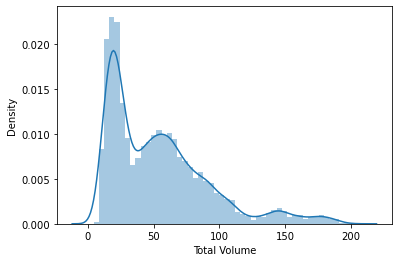

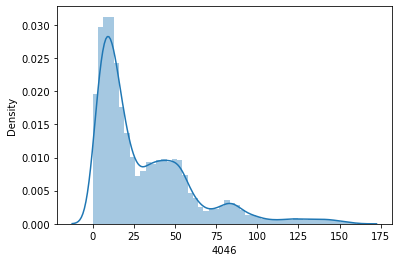

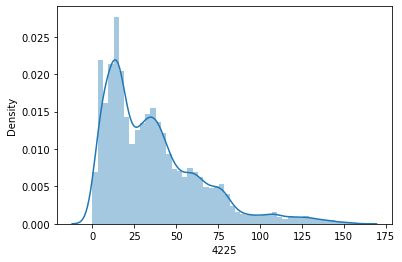

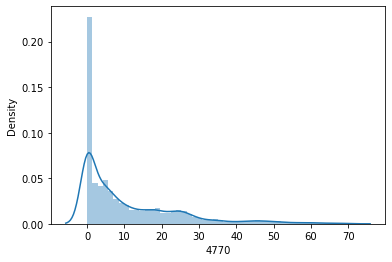

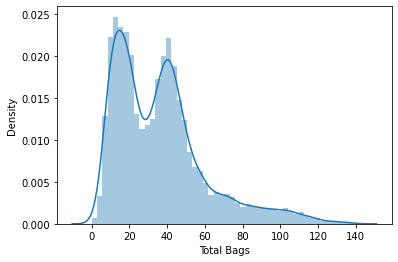

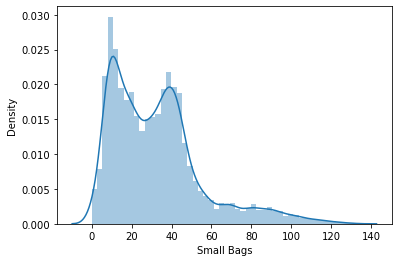

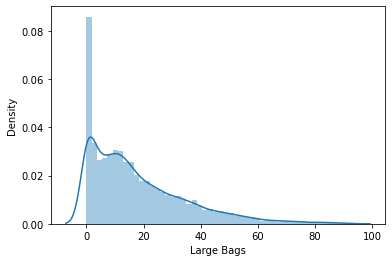

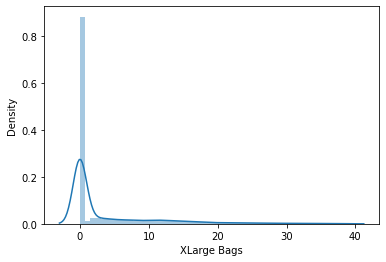

In [40]:
for i in b:
    sns.distplot(df1[i])
    plt.show()

* Here we can see that we were able to remove skewness to an extant, now we are good to go ahead.

In [41]:
# lets see whether there is anymore datalost or not?
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,0.0,2015,12,27
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,0.0,2015,12,20
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,0.0,2015,12,13
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,0.0,2015,12,6
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,53.0,2018,2,4
18245,1.71,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,53.0,2018,1,28
18246,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,53.0,2018,1,21
18247,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,53.0,2018,1,14


* Here we can see that we were able to bring down values in each column below 100 which will help us in analysing better.

# Prepairing model:

 * Here we are required to prepare two models in the same jupyter notebook,
so, we are prepairing Model 1 which will let us predict Average price First.

# Model 1:

# Here Our Target Column will be Average Price:

In [42]:
# Lets Divide columns and assign it x and y for training and testing our data
x=df1.drop(["AveragePrice"], axis=1)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,0.0,2015,12,27
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,0.0,2015,12,20
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,0.0,2015,12,13
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,0.0,2015,12,6
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,53.0,2018,2,4
18245,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,53.0,2018,1,28
18246,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,53.0,2018,1,21
18247,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,53.0,2018,1,14


In [43]:
y=df1["AveragePrice"]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

* Here we can see that Average price is a Float Dtype, so this model should be a Regression type model, still let us find the best model

In [44]:
#Finding Best Random state
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

brs=0
acc=0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    tempacc=r2_score(y_test,pred)
    if tempacc>acc:
        acc=tempacc
        brs=i
print(f"r2_score: {tempacc}")  
print(f"BRS:{brs}")

r2_score: 0.5421592108170764
BRS:6


# Multiple models:

In [45]:
# creating an algorithm to predict scores of multiple models simultaneously.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=6)
model=[LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]

for i in model:
    i.fit(x_train,y_train)
    pre=i.predict(x_test)
    print("Accuracy Score",i,"is",i.score(x_train,y_train))
    print("\nError")
    print("Mean Absolute Error", mean_absolute_error(y_test,pre))
    print("Root Mean Squared Error", (mean_squared_error(y_test,pre))**0.5)
    print("r2 Score ", r2_score(y_test,pre))
    
    
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
    print("\n\n")

Accuracy Score LinearRegression() is 0.5259564102798149

Error
Mean Absolute Error 0.20350289602109756
Root Mean Squared Error 0.25868722457266236
r2 Score  0.5600323914543162
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



Accuracy Score KNeighborsRegressor() is 0.8484037595370967

Error
Mean Absolute Error 0.1299823249490143
Root Mean Squared Error 0.18388479531210525
r2 Score  0.7776882678380934
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



Accuracy Score SVR() is 0.35464716759914217

Error
Mean Absolute Error 0.2428628677932064
Root Mean Squared Error 0.30682200971456414
r2 Score  0.3810668248365663
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



Accuracy Score RandomForestRegressor() is 0.9835188454336296

Error
Mean Absolute Error 0.090739043734421
Root Mean Squared Error 0.13100193092195186
r2 Score  0.8871695980509272
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^



Accuracy Score AdaBoostRegressor() is 0.54052200

* Here we can see that RandomForest Regressor is giving us the best score of 88.67% among all the models, lets see whether we can improve this score or not?

# Cross Validation:

In [46]:
# Using Cross Validation to finalize which is the best model
for j in model:
    cvs=cross_val_score(j, x_train,y_train, cv=5, scoring='r2')
    print("score of",j,"is,cvs")
    print("Mean Score of",j,"is",cvs.mean(),"\nStandard Deviation is",cvs.std())
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")

score of LinearRegression() is,cvs
Mean Score of LinearRegression() is 0.5242826243040886 
Standard Deviation is 0.013539795795415992
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
score of KNeighborsRegressor() is,cvs
Mean Score of KNeighborsRegressor() is 0.7475615384258685 
Standard Deviation is 0.007431774865389094
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
score of SVR() is,cvs
Mean Score of SVR() is 0.3457891597920225 
Standard Deviation is 0.015371634724799708
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
score of RandomForestRegressor() is,cvs
Mean Score of RandomForestRegressor() is 0.8715578454081541 
Standard Deviation is 0.005676197803201906
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
score of AdaBoostRegressor() is,cvs
Mean Score of AdaBoostRegressor() is 0.550074596312616 
Standard Deviation is 0.015368503582157496
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
score of Gradi

* Using Cross validation too we got 87.27% Accuracy Score from RandomForestRegressor

# Hypertuning:

In [47]:
# Hypertuning using GridSearchCV
# importing required libraries
from sklearn.model_selection import GridSearchCV
rfr=RandomForestRegressor()
parameters={"criterion":['absolute_error' , 'poisson'],"n_estimators":[100]}
clf=GridSearchCV(rfr,parameters)
clf.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['absolute_error', 'poisson'],
                         'n_estimators': [100]})

In [48]:
print(clf.best_params_)

{'criterion': 'poisson', 'n_estimators': 100}


In [49]:
rfr=RandomForestRegressor(criterion='poisson',n_estimators=100)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred=rfr.predict(x_test)
print("Accuracy score: ", r2_score(y_test,pred))
print("Mean Absolute Error", mean_absolute_error(y_test,pred))
print("Root Mean Squared Error", (mean_squared_error(y_test,pred))**0.5)

Accuracy score:  0.6519638201783922
Mean Absolute Error 0.17024822116474053
Root Mean Squared Error 0.23007891778035505


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
knr=KNeighborsRegressor()
parameters={'weights':['uniform', 'distance'],'n_neighbors':[1,5]}
clf=GridSearchCV(knr,parameters)
clf.fit(x,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5],
                         'weights': ['uniform', 'distance']})

In [51]:
print(clf.best_params_)

{'n_neighbors': 5, 'weights': 'distance'}


In [52]:
knr=KNeighborsRegressor(n_neighbors=5,weights='distance')
knr.fit(x_train,y_train)
knr.score(x_train,y_train)
pred=knr.predict(x_test)
print("Accuracy score: ", r2_score(y_test,pred))
print("Mean Absolute Error", mean_absolute_error(y_test,pred))
print("Root Mean Squared Error", (mean_squared_error(y_test,pred))**0.5)

Accuracy score:  0.7851754216150384
Mean Absolute Error 0.1272209880148953
Root Mean Squared Error 0.18076178174638158


* So after Hyper tuning i am getting best score 78.52 from Kneighbors Regression, while random forest regression which was previously giving best score of 87.21% droped to 65.98% after hypertuning.

# Conclusion:
    

KNeighborsRegression is my final model for Average Price.

# Saving the Model no.1:

In [53]:
# Saving model KNeighborsRegressor Model
# Importing required libraries to save model
import pickle

Name="Avacado_Average_price.pkl"
pickle.dump(rfr,open(Name,'wb'))


# Loading Model:

In [54]:
load_model=pickle.load(open(Name,'rb'))

load_model.predict(x_test)

array([0.8948, 1.2014, 0.9613, ..., 1.2802, 1.5239, 1.3554])

# Now Model 2:

Here Target Column is Region

We have to Build Classification Model for Region.

In [55]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,0.0,2015,12,27
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,0.0,2015,12,20
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,0.0,2015,12,13
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,0.0,2015,12,6
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,53.0,2018,2,4
18245,1.71,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,53.0,2018,1,28
18246,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,53.0,2018,1,21
18247,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,53.0,2018,1,14


In [56]:
#Lets split the data for training and testing into x1 and y1 variable
x1=df1.drop(['region'],axis=1)
x1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month,Date
0,1.33,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,0.0,2015,12,27
1,1.35,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,0.0,2015,12,20
2,0.93,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,0.0,2015,12,13
3,1.08,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,0.0,2015,12,6
4,1.28,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,1.0,2018,2,4
18245,1.71,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,1.0,2018,1,28
18246,1.87,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,1.0,2018,1,21
18247,1.93,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,1.0,2018,1,14


In [57]:
y1=df1['region']
y1

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
18244    53.0
18245    53.0
18246    53.0
18247    53.0
18248    53.0
Name: region, Length: 17651, dtype: float64

# Scaling:

In [58]:
# lets import file for scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x1=scaler.fit_transform(x1)
scaled_x1=pd.DataFrame(scaled_x1)
scaled_x1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.195352,-0.360017,-0.709648,0.059642,-0.533970,-0.648548,-0.517773,-0.796802,-0.51836,-1.019047,-1.210013,1.644612,1.289309
1,-0.143510,-0.413581,-0.755064,-0.025495,-0.516157,-0.623078,-0.490834,-0.792817,-0.51836,-1.019047,-1.210013,1.644612,0.491652
2,-1.232207,-0.123856,-0.738480,0.406050,-0.427502,-0.666838,-0.537584,-0.787683,-0.51836,-1.019047,-1.210013,1.644612,-0.306004
3,-0.843387,-0.285278,-0.699539,0.189057,-0.494395,-0.755024,-0.633026,-0.762704,-0.51836,-1.019047,-1.210013,1.644612,-1.103660
4,-0.324959,-0.437308,-0.720397,-0.032969,-0.489909,-0.739523,-0.619211,-0.720851,-0.51836,-1.019047,-1.210013,1.362113,1.517211
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17646,0.582289,-0.733974,-0.623118,-0.864717,-0.804096,-0.514919,-0.384638,-0.618863,-0.51836,0.981309,1.980756,-1.180379,-1.331562
17647,0.789660,-0.778787,-0.693490,-0.739905,-0.804096,-0.630504,-0.506311,-0.659154,-0.51836,0.981309,1.980756,-1.462878,1.403260
17648,1.204402,-0.780622,-0.693468,-0.795864,-0.136211,-0.626500,-0.492667,-0.858596,-0.51836,0.981309,1.980756,-1.462878,0.605603
17649,1.359930,-0.745606,-0.662756,-0.764122,-0.136496,-0.580423,-0.444110,-0.846859,-0.51836,0.981309,1.980756,-1.462878,-0.192053


# Random State:

In [59]:
# finding best Random State
# Importing required libraries
from sklearn.linear_model import LogisticRegression
brs1=0
acc1=0

for i in range(100,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=i)
    md=LogisticRegression()
    md.fit(x_train,y_train)
    y_pred=md.predict(x_test)
    tempaccu1=r2_score(y_test,y_pred)
    if tempaccu1>acc1:
        acc1=tempaccu1
        brs1=i

print(f"Best random_state {brs1}")

Best random_state 0


# Multiple Models:


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=0)
modelclf=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),
          RandomForestClassifier()]

for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))
    print("*******************************************************************")

Accuracy Score of LogisticRegression() is 0.17199184228416042
Confusion Matrix
 [[ 0  0  0 ...  0  0  0]
 [ 1  3  0 ...  0  1  0]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  8  0]
 [ 0  5  0 ...  5 12  0]
 [ 4  1  0 ...  0  2  9]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        74
         1.0       0.03      0.04      0.03        82
         2.0       0.53      0.53      0.53        78
         3.0       0.00      0.00      0.00        87
         4.0       0.15      0.14      0.15        84
         5.0       0.02      0.04      0.02        75
         6.0       0.27      0.22      0.24        72
         7.0       0.59      0.48      0.53        85
         8.0       0.70      0.57      0.63        98
         9.0       0.30      0.54      0.39        82
        10.0       0.00      0.00      0.00        95
        11.0       0.05      0.05      0.05        82
        12.0       0.30      0.36     

Accuracy Score of RandomForestClassifier() is 0.9018808067074553
Confusion Matrix
 [[73  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  1 ...  0  0 60]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91        74
         1.0       0.80      0.85      0.82        82
         2.0       0.95      1.00      0.97        78
         3.0       0.91      0.90      0.90        87
         4.0       0.96      0.96      0.96        84
         5.0       0.92      0.81      0.87        75
         6.0       0.99      1.00      0.99        72
         7.0       0.89      0.93      0.91        85
         8.0       0.99      0.97      0.98        98
         9.0       0.91      0.91      0.91        82
        10.0       0.86      0.89      0.88        95
        11.0       0.88      0.95      0.91        82
        12.0       0.92      0.98  

# Conclusion:

RandomForestClassifier is giving highest accuracy of 90%

In [61]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred1=rfc.predict(x_test)

print("Accuracy Score of RandomForestClassifier is",accuracy_score(y_test,pred1))
print("Confusion Matrix\n",confusion_matrix(y_test,pred1))
print("Classification Report\n", classification_report(y_test,pred1))

Accuracy Score of RandomForestClassifier is 0.905733061409472
Confusion Matrix
 [[71  0  0 ...  0  0  0]
 [ 0 68  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  1 ...  0  0 62]]
Classification Report
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.90        74
         1.0       0.79      0.83      0.81        82
         2.0       0.96      1.00      0.98        78
         3.0       0.92      0.90      0.91        87
         4.0       0.98      0.96      0.97        84
         5.0       0.86      0.84      0.85        75
         6.0       0.99      1.00      0.99        72
         7.0       0.88      0.94      0.91        85
         8.0       0.99      0.96      0.97        98
         9.0       0.89      0.90      0.90        82
        10.0       0.83      0.89      0.86        95
        11.0       0.90      0.96      0.93        82
        12.0       0.91      0.99     

# Saving Model 2:

In [62]:
import pickle
f_name='Avacado_region.pkl'
pickle.dump(rfc,open(f_name,'wb'))

# Loading Model 2:

In [63]:
mod2=pickle.load(open(f_name,'rb'))

mod2.predict(x_test)

array([11., 38.,  0., ..., 11., 12., 17.])